## Technikalia

### Konfiguracje

In [35]:
AUDIO_DIR = 'audio'
import os

### Dane

In [45]:
import pandas as pd, numpy as np, librosa, librosa.display

### Spotify API i sieć

In [37]:
import spotipy, requests
from spotipy.oauth2 import SpotifyClientCredentials

def load_creds():
    from dotenv import load_dotenv
    load_dotenv()
    
load_creds()

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Wykresy i prezencja

In [38]:
from IPython.display import Audio as NotebookAudio
import matplotlib.pyplot as plt
import numpy as np

## Wgląd w piosenki Spotify

In [39]:
def search(artist:str, track:str):
    results = sp.search(q=f'artist:{artist} track:{track}', limit=1)
    if results['tracks']['items']:
        return results['tracks']['items'][0]
    else:
        return None

### Pobieranie pliku mp3

**Notka**: nie każda piosenka ma podgląd mp3 - chciałem pobrać _Avicii_, _Wake Me Up_, ale nie było. Krawczyk z kolei zawsze na swoim miejscu.

In [62]:
def get_mp3(song):
    if song:
        track_id = song['id']
        track = sp.track(track_id)
        mp3_url = track['preview_url']
        file_name = f"{AUDIO_DIR}/{track_id}.mp3"

        if not os.path.exists(file_name) and mp3_url:
            response = requests.get(mp3_url)

            print(f"Downloading {file_name}...")
            with open(file_name, 'wb') as f:
                f.write(response.content)

        track['file_name'] = file_name
        return track if os.path.exists(file_name) else None
    else:
        return None

In [63]:
audio_files = [
    get_mp3( search('Krzysztof Krawczyk', 'Parostatek') )
]

In [65]:
NotebookAudio(audio_files[0]['file_name'])

## Sygnał - słaba kwantyzacja

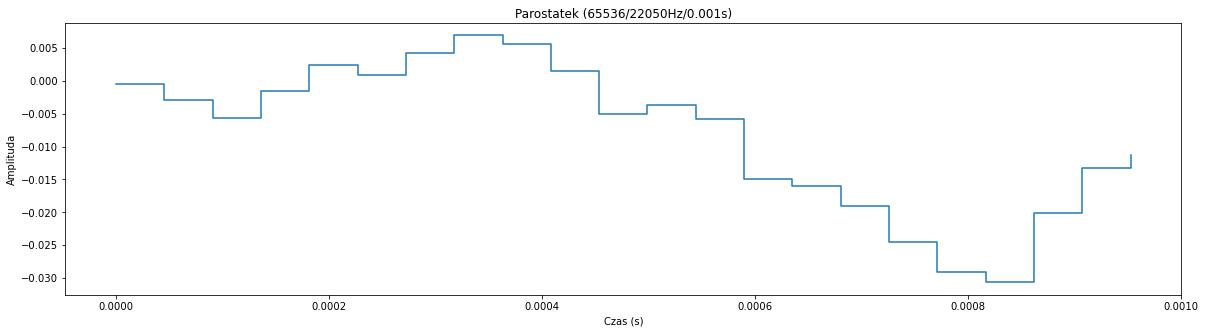

In [79]:
def plot_quantized_signal(file_name, seconds, sample_rate=22050, quantization_levels=65_536, title='Sygnał'):
    signal, _ = librosa.load(file_name, sr=sample_rate)

    samples = int(seconds * sample_rate)
    signal = signal[:samples]

    signal = np.round(signal * (quantization_levels - 1)) / (quantization_levels - 1)

    time = np.arange(0, len(signal)) / sample_rate

    signal_series = pd.Series(signal, index=time)

    ax = signal_series.plot(drawstyle='steps-post', figsize=(20, 5))
    ax.set_title(f'{title} ({quantization_levels}/{sample_rate}Hz/{seconds}s)')
    ax.set_xlabel('Czas (s)')
    ax.set_ylabel('Amplituda')

plot_quantized_signal(audio_files[0]['file_name'], seconds=0.001, title=audio_files[0]['name'])